# Importação


In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de Previsão
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, StandardScaler
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

from skopt import gp_minimize
from skopt import dummy_minimize



In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Assuntos Exemplos/Regressão/Pasta sem nome/insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Análise

Tópicos Abordados
- Informações dos dados, como: Tamanho, Tipo e Vazios.
- Dispersão dos dados numéricos.
- Composição dos dados categóricos.

Essas informações são fundamentais para saber como os dados devem ser tratados.

## Informações Gerais dos dados

Essa etapa tem como objetivo avaliar inicialmente o dataset, tentando encontrar já alguns pontos que precisem de ajustes.

In [ ]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# Verificar se há algum tipo de incoerência dos dados
for i in dataset:
  print(dataset[i].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
['female' 'male']
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505


In [ ]:
# Verificar qual o range dos dados
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Se há dados empty.
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Tamanho do dataset (linhas, colunas)
dataset.shape

(1338, 7)

In [ ]:
# Informações sobre cada coluna do dataset
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Dados Categóricos.
dataset.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
# Dados duplicados
dataset.duplicated().sum()

1

<h1> Conclusão análise inicial </h1>

- Os dados não demonstraram nenhuma necessidade de interferência, pelas seguintes razões:
- Não apresentou vazios.
- Duplicados podem ser aceitos devido aos dados serem bem genéricos.
- Os dados não aparentam terem entradas errôneas.

## Dados Numéricos

O objetivo aqui é avaliar como os dados numéricos estão de comportando como: Distribuição se é normal, se há dados desbalanceados, se há categóricos que podem ser reduzidos, etc...

### Funções Gráficas 

In [ ]:
def imagem_0(df,column):
  """
  Gráfico de dispersão 

  """
  # ------------- Configuração de Figura
  figura = plt.figure(figsize=(15,15))
  figura.suptitle(f"Avaliação dos Dados Numéricos : {column}", fontsize=30, color='grey')
  tamanho = (2,2)

  # -------------- Box -==================================
  ## Ax 
  pos = (0,0)
  ax1 = plt.subplot2grid(tamanho, pos,colspan=2)

  ## Plot
  box = sns.boxplot(
      orient='h',
      x = df,
      ax= ax1,
      width = 0.3,
      boxprops= {"facecolor": (.4, .6, .8, .5), "edgecolor": "grey", "linewidth": 0.5}, # Cor do box e cor das bordas do box
      whiskerprops={"color": "grey", "linewidth": 0.5}, # Cor das linhas acima e abaixo do q1 e 13
      capprops={"color": "grey", "linewidth": 0.5}, # Cor da barra limite 
      medianprops={"color": "grey", "linewidth": 0.5}
  )




  box.set_title('Gráfico de dispersão Interquartíl',horizontalalignment='left', x=0,fontsize=16,color='grey')

  ## Conf
  quantiles = df.quantile([0.25, 0.75]).values.tolist()
  LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5)
  LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5)
  if LI < df.min():
    LI = df.min()
  if LS > df.max():
    LS = df.max()

  # quantiles.extend([int(LI),int(LS)])

  for i in quantiles:
    box.annotate(i, xy=(i+0.1, -0.17), fontsize=15, color='black')

  for i in [int(LI),int(LS)]:
    box.annotate(i, xy=(i+0.1, 0.1), fontsize=15, color='black')
  
  plt.axis('off')


  # -------------- Histograma ==================================
  ## Ax 
  pos = (1,0)
  ax2 = plt.subplot2grid(tamanho, pos,colspan=2)

  ## Plot
  hist = sns.histplot(
      x = df,
      ax = ax2,
      bins=20,
      color='skyblue'
  )

  hist.spines['top'].set_visible(False)
  hist.spines['right'].set_visible(False)
  hist.spines['left'].set_color('darkgrey')
  hist.spines['bottom'].set_color('darkgrey')
  hist.tick_params(axis='both', colors='darkgrey')

  hist.set_ylabel('Contagem de elementos', horizontalalignment='right', y=1.0, color='black')
  hist.set_xlabel(column, horizontalalignment='left', x=0, fontsize=10, color='black')

  hist.set_title('Gráfico de dispersão histograma',horizontalalignment='left', x=0, fontsize=16,color='grey')
  ## Conf



### Análise

In [ ]:
print(f"Itens numéricos a serem avaliados : {dataset.select_dtypes(include=np.number).columns.tolist()}")

Itens numéricos a serem avaliados : ['age', 'bmi', 'children', 'charges']


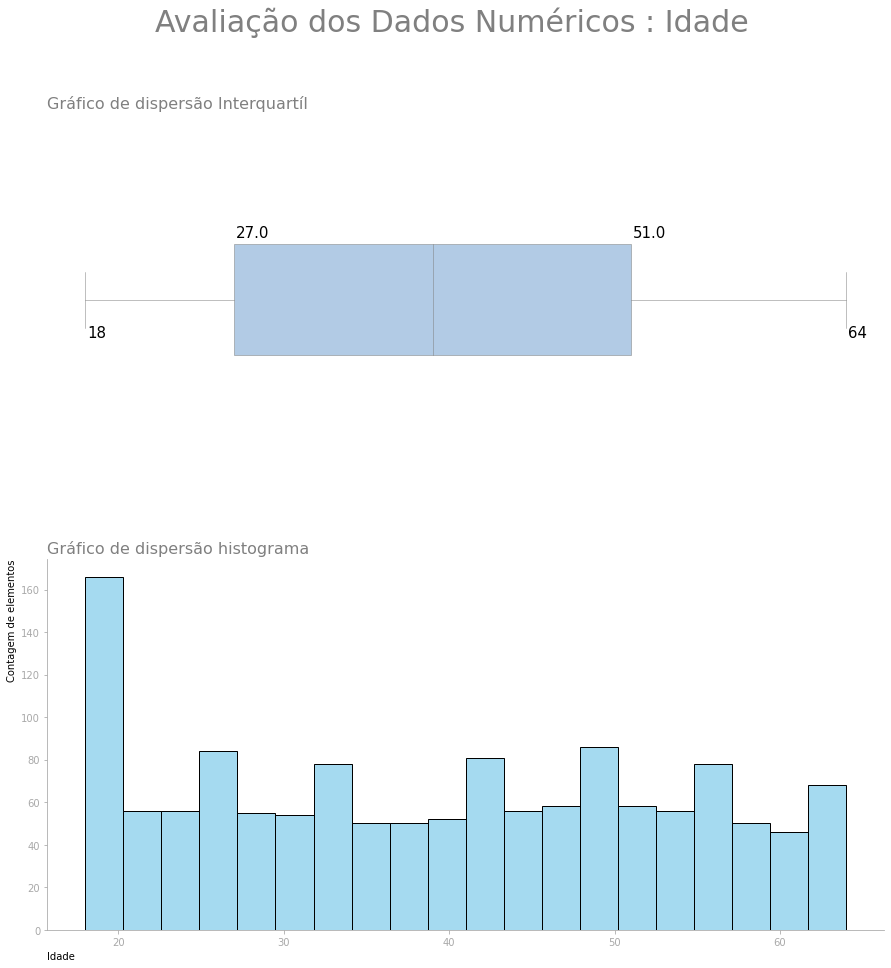

In [ ]:
imagem_0(dataset['age'], 'Idade')

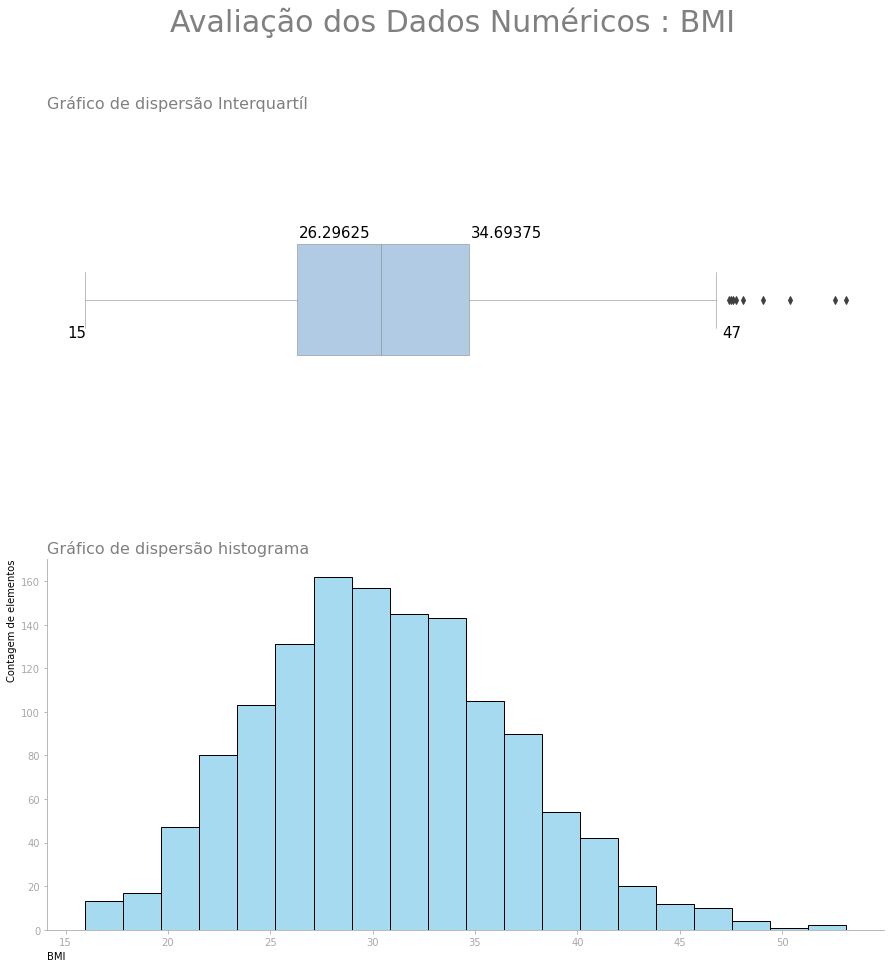

In [ ]:
imagem_0(dataset['bmi'], 'BMI')

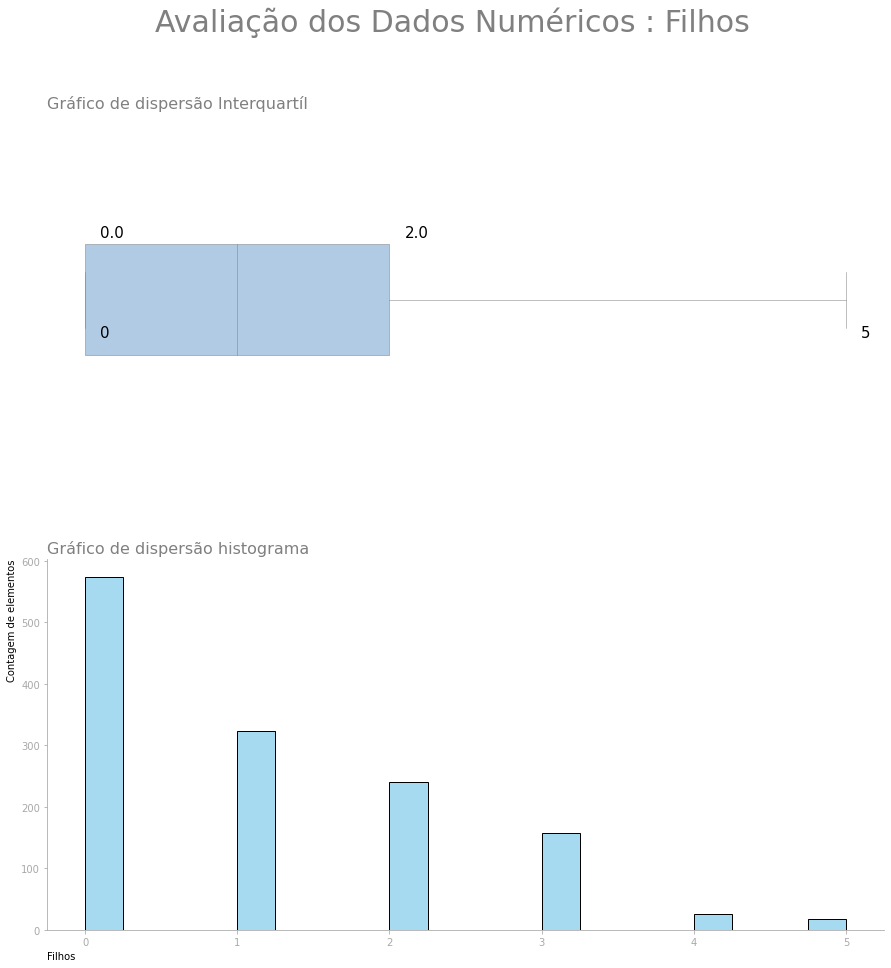

In [ ]:
imagem_0(dataset['children'], 'Filhos')

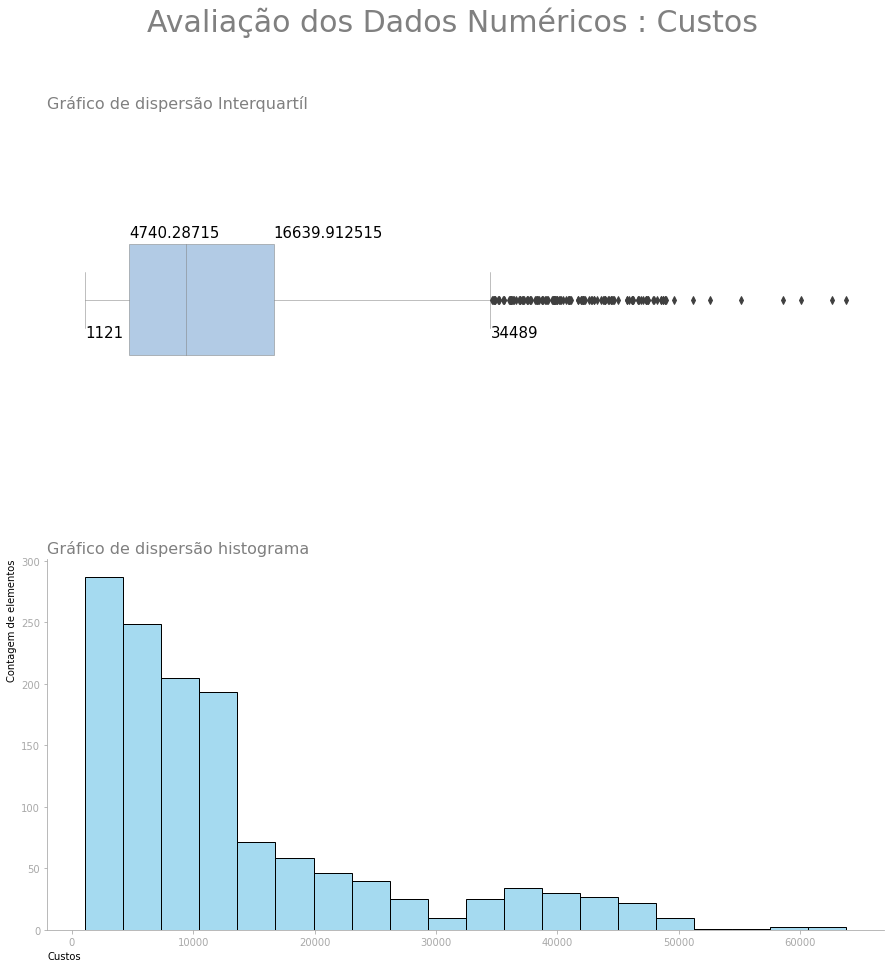

In [ ]:
imagem_0(dataset['charges'], 'Custos')

<h1> Análise dos dados numéricos </h1>


- Idade segue tendo uma distribuição quase uniforme, com uma concentração maior de dados até 20 anos.
- BMI segue uma distribuição normal, evitando já a necessidade de normalização desses dados.
- A concentração de 75% dos dados é de clientes com até 2 filhos.
- Os dados de previsão demonstram que acima de 34489 os valores começam a ser outliers, esses casos podem ser estudados para um conhecimento do que influência esses valores. Esses dados ainda apresentam uma distribuição do tipo exponencial, ou seja, o pico dos dados é do primeiro range do histograma e vai decaindo.


In [ ]:
dados = dataset.copy()
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_cost = dados.pop('charges')

## Dados Categóricos

Tem como objetivo avaliar certas características dos dados categóricos, como: Desbalanceamento, dados errados, medida central desses dados, etc...


### Função


In [ ]:
def imagem_2(df, column, titulo):
  plt.figure(figsize=(15,10))
  plt.suptitle(f'Dado Categórico Avaliado: {titulo}', fontsize=30, horizontalalignment='left', x=0,color='grey')
  



  barra = sns.barplot(orient='h',
              x = df[column].value_counts().values,
              y = df[column].value_counts().index,
              palette ='mako',
              dodge=False) 


  # Mostrar porcengatem de cada categoria.
  a = ((df[column].value_counts().values / df[column].shape[0])*100).tolist()
  b = df[column].value_counts().values.tolist()
  c = []
  for aa, bb in zip(a, b):
    c.append(f'{bb} '+ f'({aa:.2f}%)')

  # Mostrar dados no gráfico.
  co = 0  
  for val, pos in zip(c, df[column].value_counts().values):
    barra.annotate(
        val,
        xy =  (pos*1.02, co),
        fontsize=15
    )

    co+=1

  # Ajustes de configuração de axis.
  barra.set_title("Contagem das categorias", horizontalalignment='left', color='grey', x=0)
  barra.spines['top'].set_visible(False)
  barra.spines['right'].set_visible(False)
  barra.spines['left'].set_visible(False)
  barra.spines['bottom'].set_color('darkgrey')
  barra.tick_params(axis='y', colors='black')
  barra.tick_params(axis='x', colors='darkgrey')


In [ ]:
a = ((dataset['sex'].value_counts().values / dataset['sex'].shape[0])*100).tolist()
b = dataset['sex'].value_counts().values.tolist()
c = []
for aa, bb in zip(a, b):
  c.append(f'{bb} '+ f'({aa:.2f}%)')

c

['676 (50.52%)', '662 (49.48%)']

### Análise

In [ ]:
(f"Dados Categóricos avaliados: {dataset.select_dtypes(include='object').columns.tolist()}")

"Dados Categóricos avaliados: ['sex', 'smoker', 'region']"

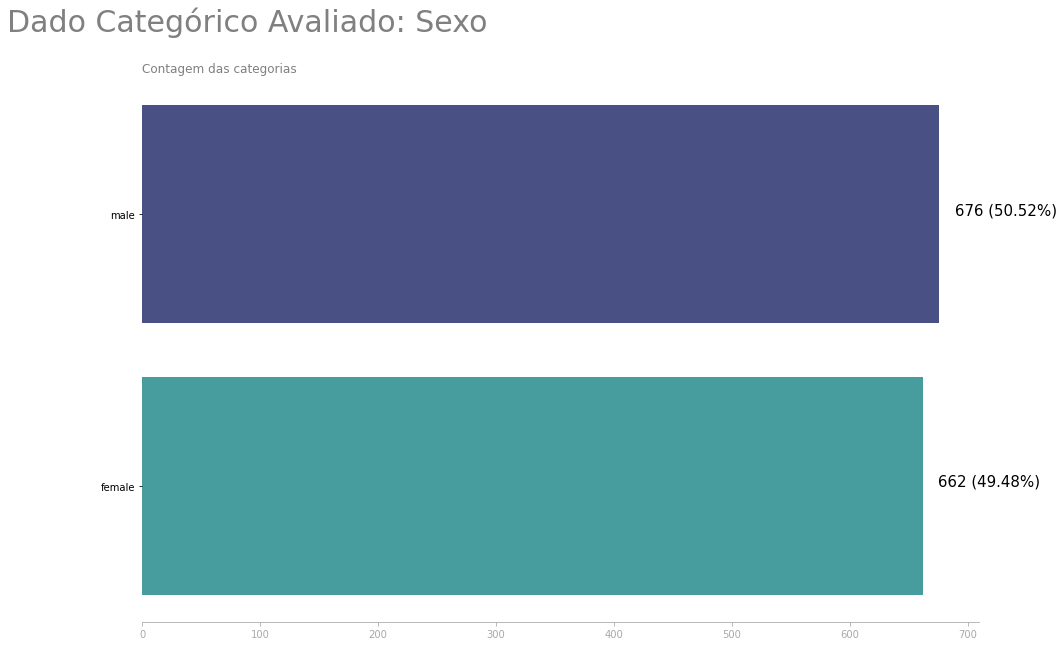

In [ ]:
imagem_2(dataset,'sex','Sexo')

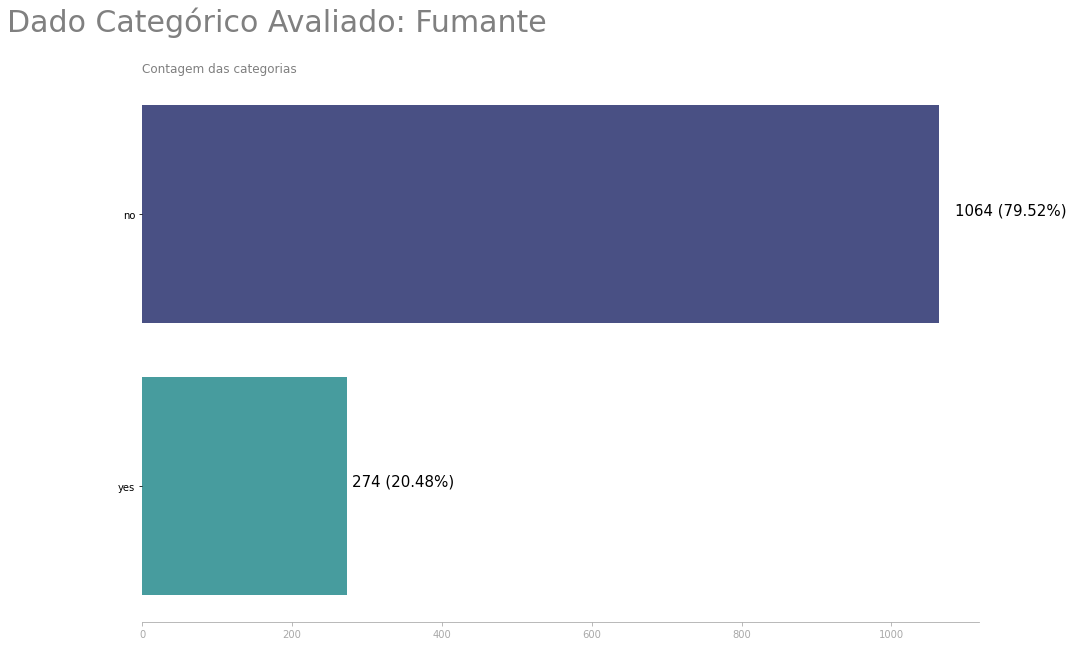

In [ ]:
imagem_2(dataset,'smoker','Fumante')


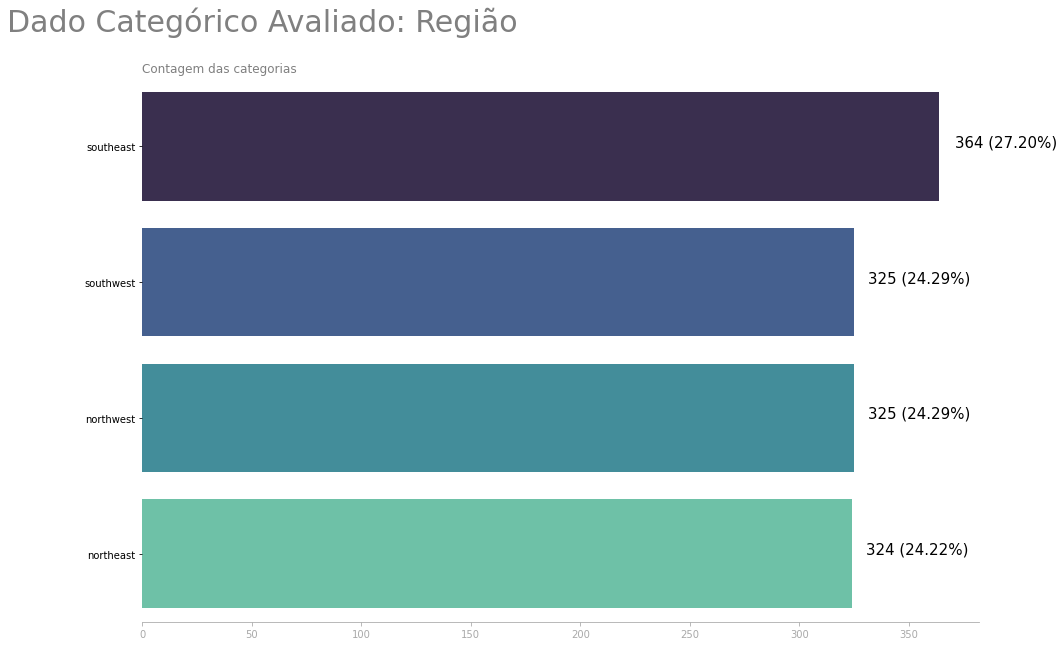

In [ ]:
imagem_2(dataset,'region','Região')

## Correlação

### Função

In [ ]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
def imagem_3_num(df, alvo, analise, titulo):
  # Configuração inicial
  plt.figure(figsize=(15,10))
  plt.suptitle(f'Análise de correlação : {titulo}', fontsize=30, horizontalalignment='left',x=0, color='gray')

  # Plot
  plot = sns.regplot(
      x = df[alvo].values,
      y = df[analise],
      scatter_kws={"color": "darkgrey"}, line_kws={"color": "teal"}
  )


  plot.set_title('Gráfico de dispersão', horizontalalignment='left', x=0, color='grey')

  # Ajustes das axis 
  plot.spines['top'].set_visible(False)
  plot.spines['right'].set_visible(False)
  plot.spines['bottom'].set_color('darkgrey')
  plot.spines['left'].set_color('darkgrey')
  plot.tick_params(axis='y', colors='darkgrey')
  plot.tick_params(axis='x', colors='darkgrey')
  plot.set_ylabel(analise.capitalize(), horizontalalignment='right', y=1.0, color='black',fontsize=15)
  plot.set_xlabel(alvo.capitalize(), horizontalalignment='right', x=1, fontsize=15, color='black')



In [ ]:
def imagem_3_cat(dfe, alvo, analise, titulo, rev):
  # Configuração Inicial
  df = dfe.copy()
  plt.figure(figsize=(15,10))
  plt.suptitle(f'Análise de correlação : {titulo}', x = 0, fontsize=30, horizontalalignment='left', color='grey')

  if df[analise].dtype == int: # Se for númerico os dados, passar para string
    df[analise] =  df[analise].astype(str)

  # Plot
  plot = sns.boxplot(
      orient='h',
      data = df,
      x = alvo,
      y = analise,
      order = df[analise].value_counts().index.tolist(),
      palette='rocket',
      width = 0.3,
      boxprops= {"facecolor": (.4, .6, .8, .5), "edgecolor": "grey", "linewidth": 0.5}, # Cor do box e cor das bordas do box
      whiskerprops={"color": "grey", "linewidth": 0.5}, # Cor das linhas acima e abaixo do q1 e 13
      capprops={"color": "grey", "linewidth": 0.5}, # Cor da barra limite 
      medianprops={"color": "grey", "linewidth": 0.5}
  )

  # Plot do texto 
  f = 0
  sz = (len(df[analise].value_counts().index.tolist())/100) + 0.1 # Espaço da plotagem

  for i in df[analise].value_counts().index.tolist(): # Cálculo dos quantiles e limites
    df_temporario = df.loc[df[analise] == i,alvo]
    quantiles = df_temporario.quantile([0.25,0.75]).values.tolist()
    LI = quantiles[0] - ((quantiles[1] - quantiles[0])*1.5)
    LS = quantiles[1] + ((quantiles[1] - quantiles[0])*1.5)
    if LI < df_temporario.min():
      LI = df_temporario.min()

    LS = max(df.loc[df[analise] == i, alvo][df.loc[df[analise] == i, alvo] <= LS].tolist()) 

    for i in quantiles:
      plot.annotate(round(i,2), xy=(i+0.1, f - 0.17), fontsize=10, color='black')

    for i in [int(LI),int(LS)]:
      plot.annotate(i, xy=(i+0.1, f + sz), fontsize=10, color='black')
    f+=1

  # Configuração de axis
  plot.spines['top'].set_visible(False)
  plot.spines['right'].set_visible(False)
  plot.spines['left'].set_visible(False)
  plot.tick_params(axis='y', colors='black')
  plot.tick_params(axis='x', colors='black')
  plot.spines['bottom'].set_color('darkgrey')

  plot.set_ylabel(analise.capitalize(), horizontalalignment='right', y=1.0, color='black',fontsize=15)
  plot.set_xlabel(alvo.capitalize(), horizontalalignment='right', x=1, fontsize=15, color='black')


### Análise

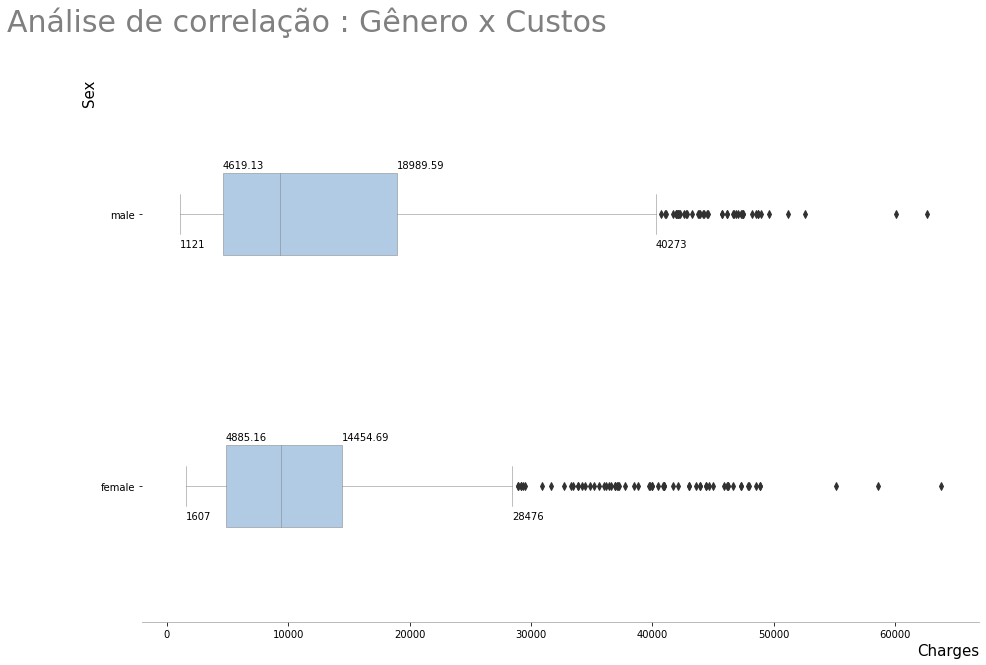

In [ ]:
imagem_3_cat(dataset, 'charges', 'sex', 'Gênero x Custos', True)

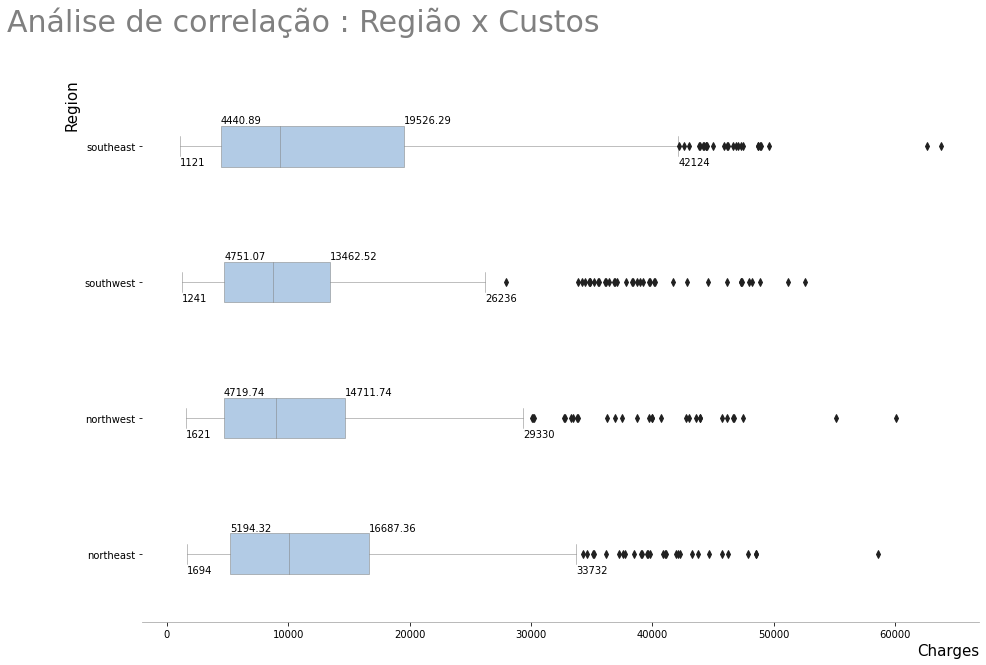

In [ ]:
imagem_3_cat(dataset, 'charges', 'region', 'Região x Custos', False)

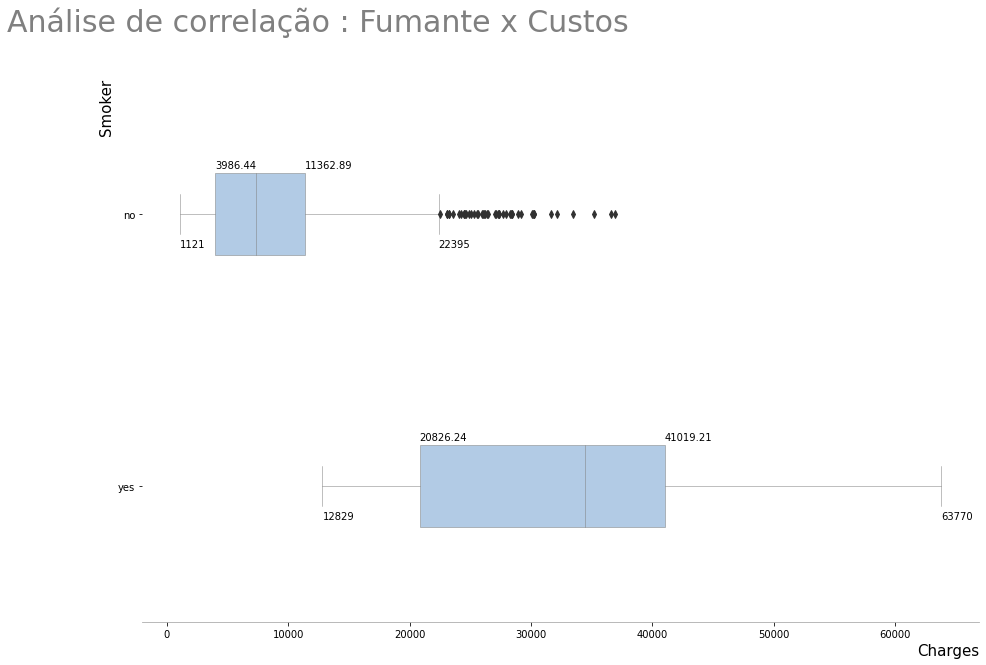

In [ ]:
imagem_3_cat(dataset, 'charges', 'smoker', 'Fumante x Custos', False)

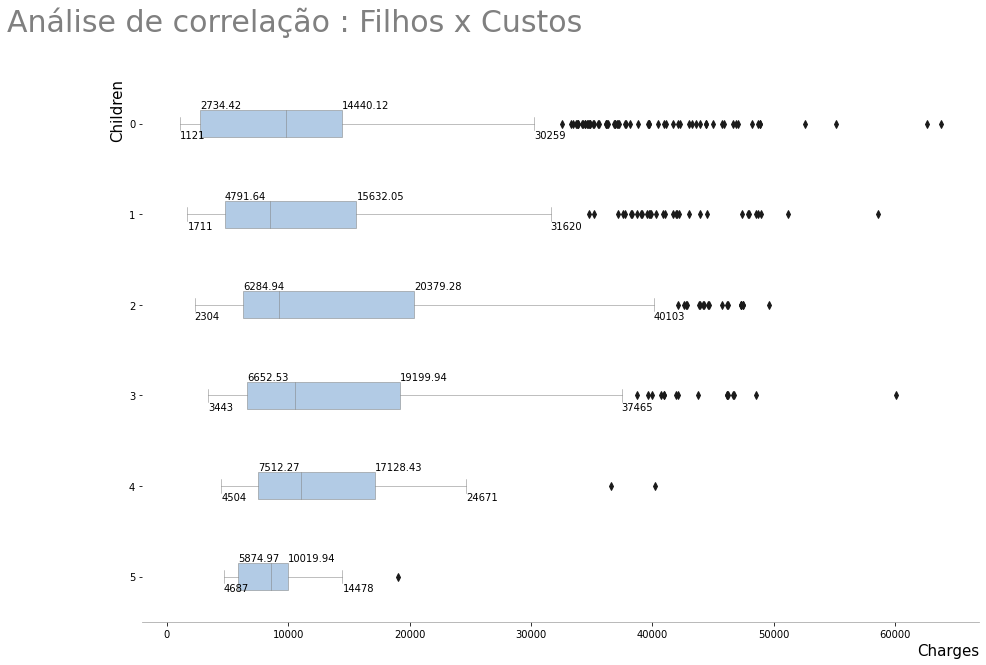

In [ ]:
# Como os dados de filhos tem somente 6 classes, uma análise de box pode ser melhor entendida
imagem_3_cat(dataset, 'charges', 'children', 'Filhos x Custos', False)

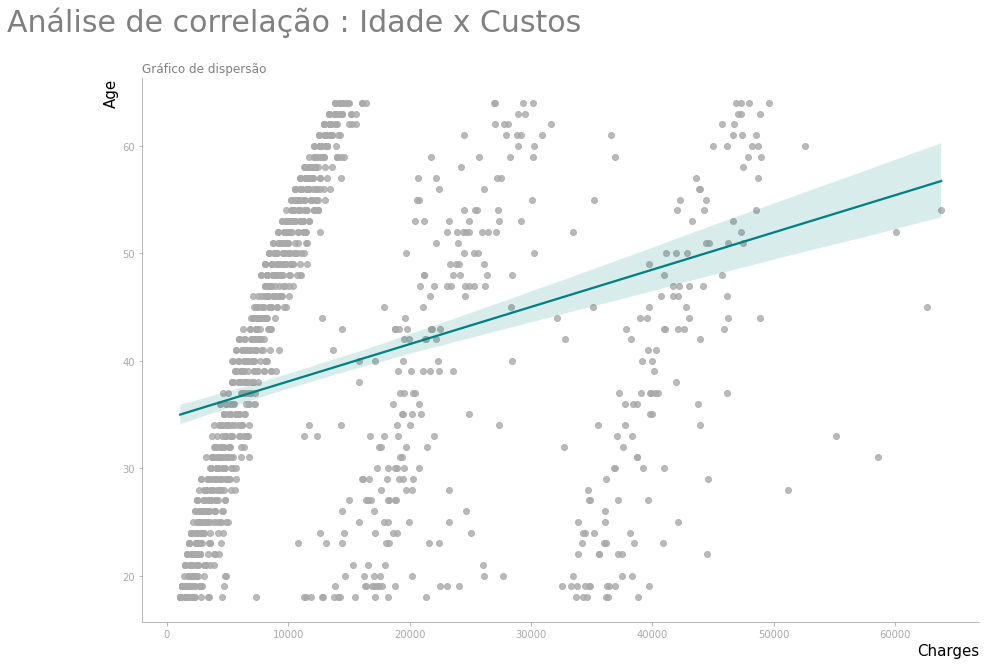

In [ ]:
imagem_3_num(dataset, 'charges', 'age', 'Idade x Custos')

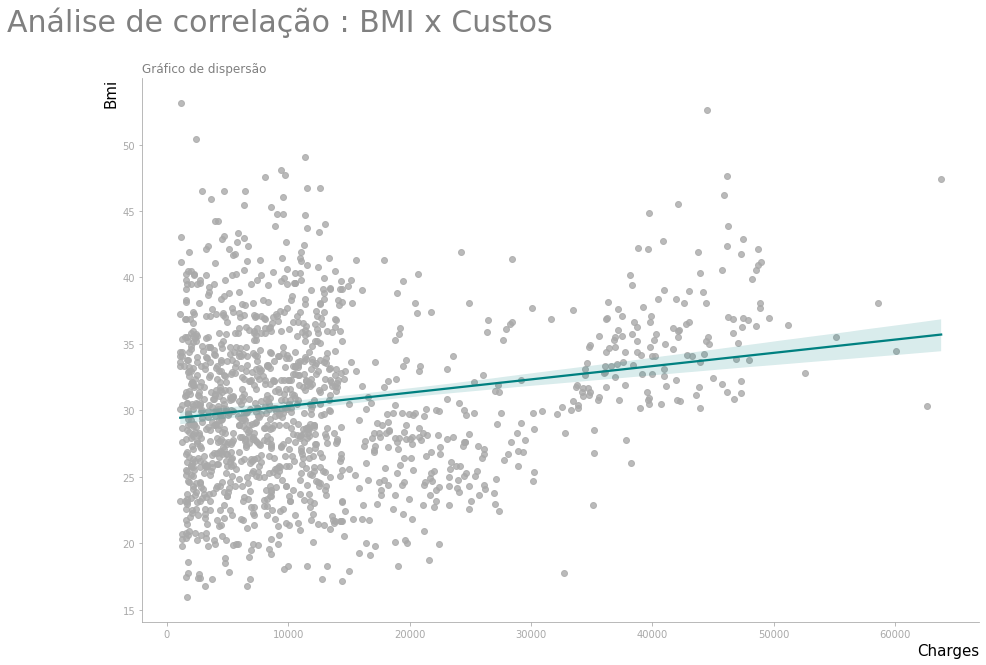

In [ ]:
imagem_3_num(dataset, 'charges', 'bmi', 'BMI x Custos')

<h1> Conclusão da análise preliminar das correlações </h1>

<h2> Dados Categóricos </h2>

- Em relação ao gênero do cliente, os do sexo masculino apresentam um range maior no valor total de custos do que as mulheres.
- Sobre ser fumante ou não: As maiores concentrações de custos estão para as pessoas fumantes.
- Apesar dos primeiros 25 % dos valores serem semelhantes nas 4 regiões, os valores da região southeast apresenta um limite superior bem acima do que as demais regiões, lendo-se que é a região com maior custo.
- Como os dados de filhos são divididos em 6 dados, é mais fácil analisar através dos boxs que demonstra um range maior de custo para as pessoas com 2-3 filhos, mas o mais interessante é que pessoas com 4-5 filhos acabam tendo um custo menor do que 0-3.

<h2> Dados Numéricos </h2>

- Analisando os gráficos de distribuição com regressão linear, percebe-se que os dados crescem ao decorrer do tempo, tanto para a idade (quanto mais velho, maior o custo), quanto o BMI.

# Modelo de Machine Learning


<h1> Etapas do Modelo </h1>

<h2> Feature Engineering </h2>

- Função feita para ter o tratamento dos dados.
- Função feita para poder comparar diferentes tratamento, tais como:
- Feature Generation.
- StandardScaler.
- Normalização da saída.

<h2> Modelos de ML </h2>

- Em uma avaliação de ML é importante testar diferentes tipos para ter uma forma de comparação do comportamento desses modelos e assim poder trabalhar com o melhor. Serão testados:
    - Elastic Net
    - Regressão Linear
    - Regressão Polinomial
    - LightGBM
    - Gradient Boost

<h2> Avaliação de Modelos </h2>

- Já que não há um dataset de teste para a avaliação, a melhor forma de avaliar os modelos de machine learning é utilizando a validação cruzada, que vai poder dar uma noção mais real de como o modelo se saiu com o dataset.

<h2> Seleção Melhor Modelo e Hiperparâmetros </h2>

- Com os dados iniciais, pode-se selecionar o melhor modelo e trabalhar na melhora das suas funções para encontrar o melhor resultado de previsão.


## Feature Engineering

### Estudo de Feature Generation

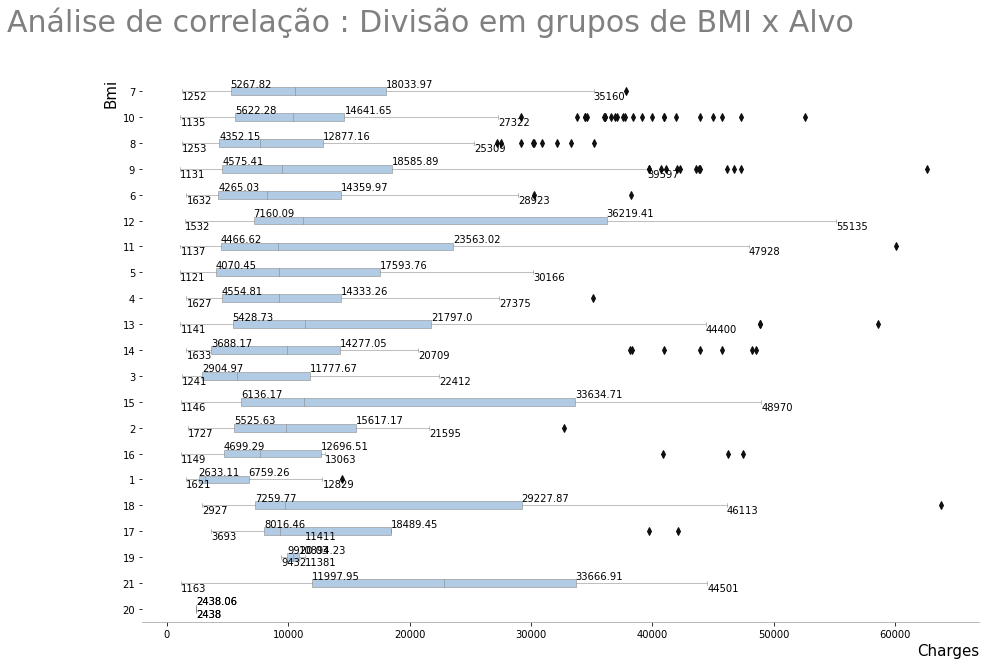

In [ ]:
data_teste = pd.cut(dataset['bmi'], bins=21, labels=[i+1 for i in range(21)]).astype(int).copy()
data_teste = pd.DataFrame(data_teste)
data_teste = pd.concat([data_teste, dataset['charges']], axis=1)
imagem_3_cat(data_teste, 'charges', 'bmi', 'Divisão em grupos de BMI x Alvo', False)

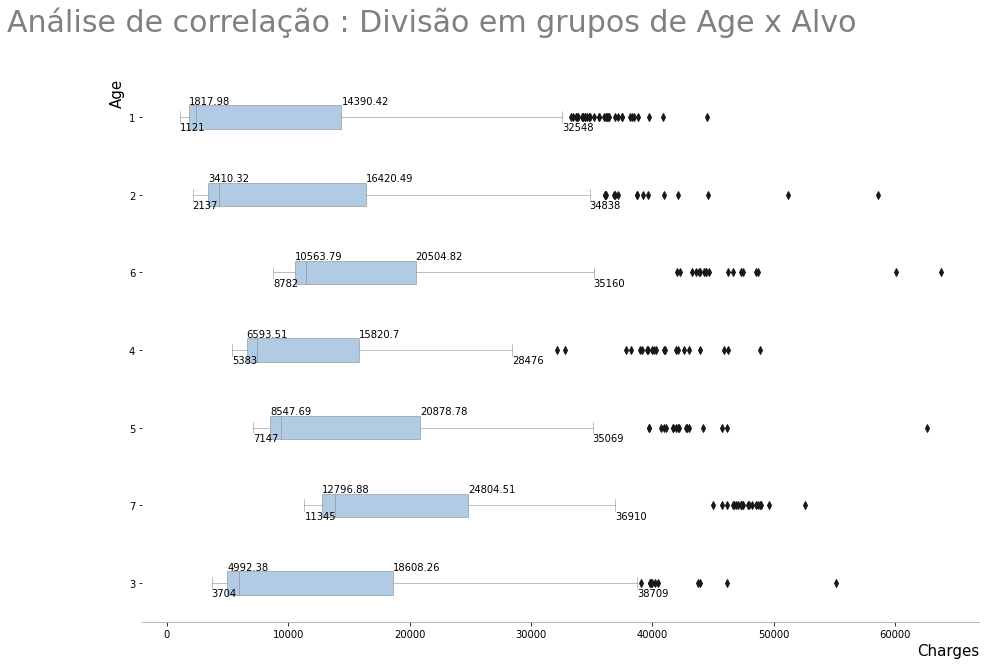

In [ ]:
data_teste = pd.cut(dataset['age'], bins=7, labels=[i+1 for i in range(7)]).astype(int).copy()
data_teste = pd.DataFrame(data_teste)
data_teste = pd.concat([data_teste, dataset['charges']], axis=1)
imagem_3_cat(data_teste, 'charges', 'age', 'Divisão em grupos de Age x Alvo', False)

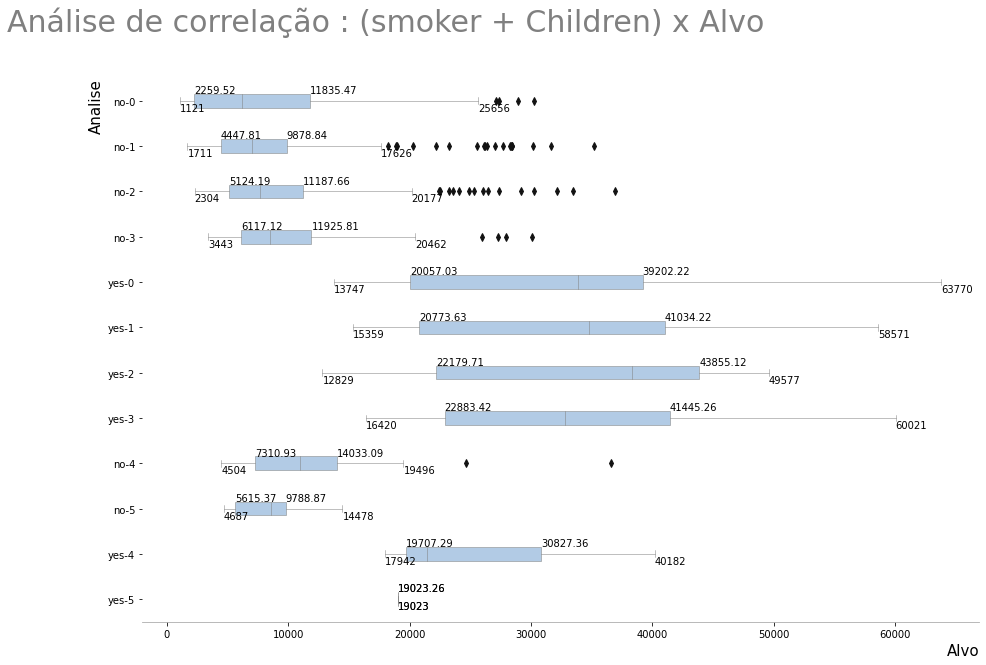

In [ ]:
data_teste = dataset[["smoker", "children"]].astype(str).apply("-".join, axis=1)
data_teste = pd.DataFrame(data_teste, columns=['analise'])
data_teste['alvo'] = dataset['charges'].copy()
imagem_3_cat(data_teste, 'alvo', 'analise', '(smoker + Children) x Alvo', False)


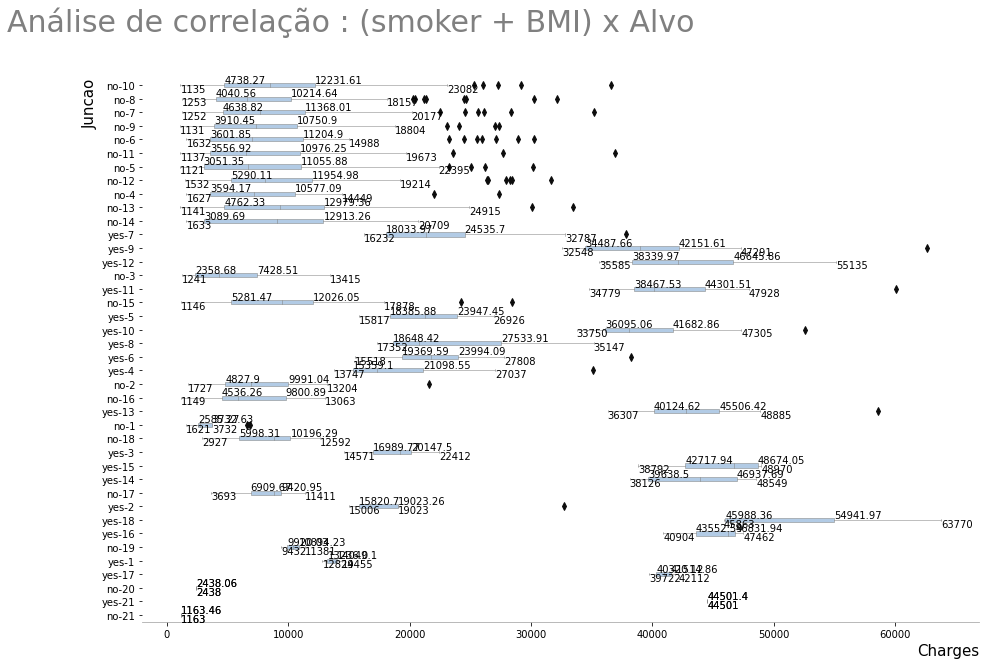

In [ ]:
data_teste = pd.cut(dataset['bmi'], bins=21, labels=[i+1 for i in range(21)]).astype(int).copy()
data_teste = pd.DataFrame(data_teste)
data_teste = pd.concat([data_teste, dataset[['smoker','charges']]], axis=1)
data_teste['juncao'] = data_teste[["smoker", "bmi"]].astype(str).apply("-".join, axis=1)
imagem_3_cat(data_teste, 'charges', 'juncao', '(smoker + BMI) x Alvo', False)

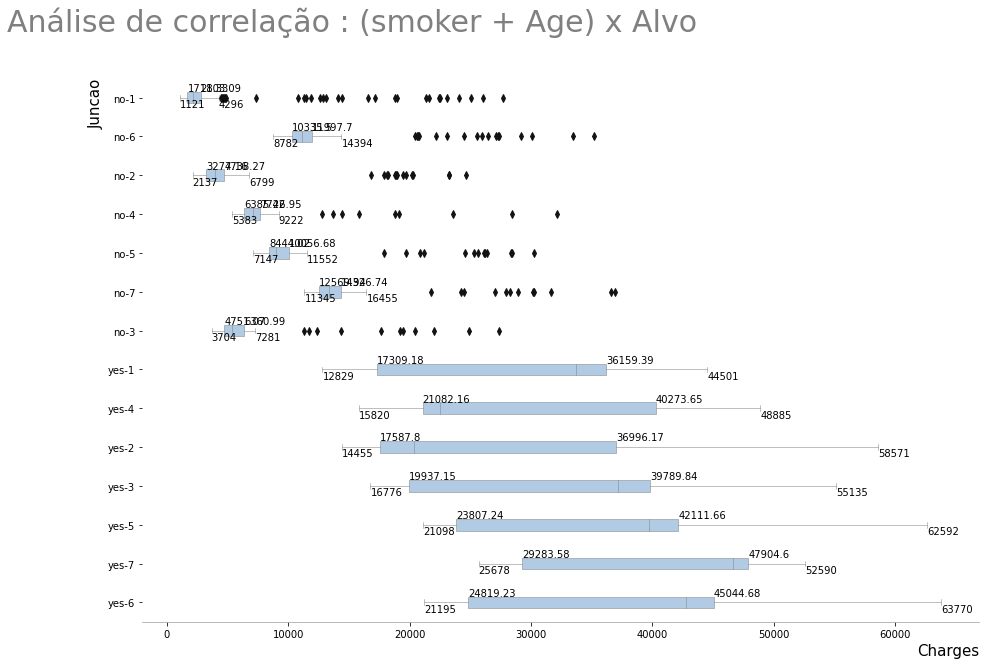

In [ ]:
data_teste = pd.cut(dataset['age'], bins=7, labels=[i+1 for i in range(7)]).astype(int).copy()
data_teste = pd.DataFrame(data_teste)
data_teste = pd.concat([data_teste, dataset[['smoker','charges']]], axis=1)
data_teste['juncao'] = data_teste[["smoker", "age"]].astype(str).apply("-".join, axis=1)
imagem_3_cat(data_teste, 'charges', 'juncao', '(smoker + Age) x Alvo', False)

<h1> Conclusão Feature Generation </h1>

- Os resultados apresentados foram interessantes, mostrando que ser fumante é realmente uma classe muito forte na determinação dos custos e sua relação com outras classes cria grupos que podem facilitar a previsão dos resultados.
- Mesmo na análise os grupos se mostrarem que podem facilitar o aprendizado da maquina, isso não necessariamente irá acontecer. Para isso será testado diversas formas do dataset para avaliar o melhor resultado.

### Função Feature Engineering

In [ ]:
def tratamento(dt, fea_eng=False, std=False, norm=False, enc=False):
  """
  Função voltada para tratamento dos dados.
  -----------
  data : DataFrame
    Dados de entrada do modelo de ML
  fea_eng : Condicional
    Se True, criar novos dados a partir dos originais
  LabEnc : Condicional
    Se True, passar dados categóricos para o formato numérico
  std : Condicional
    Se True, aplicar normalização dos dados
  -----------
  """
  data = dt.copy()
  # Separando o alvo do dataset.
  alvo = data.pop('charges')

  if norm == True:
    alvo = np.log(alvo)

  data['children'] = data['children'].astype(str)
  # Feature Generation
  if fea_eng == True:
    data['faixa_age'] = pd.cut(data['age'], bins=7, labels=[i+1 for i in range(7)]).astype(int)
    data['faixa_bmi'] = pd.cut(data['bmi'], bins=21, labels=[i+1 for i in range(21)]).astype(int)
    data['smk_age'] = data[["smoker", "faixa_age"]].astype(str).apply("_".join, axis=1)
    data['smk_bmi'] = data[["smoker", "faixa_bmi"]].astype(str).apply("_".join, axis=1)
    data['smk_chi'] = data[["smoker", "children"]].astype(str).apply("_".join, axis=1)


  # Aplicando normalização nos dados de entrada.

  if std == True:
    for i in  data.select_dtypes(include='object'):
      data[i] = LabelEncoder().fit_transform(data[i])
    data.iloc[:,:] = StandardScaler().fit_transform(data)
    col = dt.select_dtypes(include='object').columns.tolist()
    data[col] = data[col].astype('object')
  if enc == True:
    for i in  data.select_dtypes(include='object'):
        data[i] = LabelEncoder().fit_transform(data[i])

  return data, alvo

## Modelo ML


### Função

In [ ]:
def modelo(x, y):
  """
  Os dados de entrada serão usados nos modeos de previsão e os resultados serão salvos
  em um DataFrame.

  ------------------------

  ------------------------
  """
  X = x.copy()

  # erro = 'neg_root_mean_squared_error'
  for i in  x.select_dtypes(include='object'):
    x[i] = LabelEncoder().fit_transform(x[i])

  erro = 'r2'
  params = {'X':x,
            'y':y,
            'scoring':erro}
  cv = 10

  # DataFrame para resultado
  resultado = []

  # Modelo ElasticNet
  model = ElasticNet()
  previsao = (cross_val_score(**params ,estimator=model, cv=cv).mean())

  resultado.append(['ElasticNet',previsao])

  # Regressão Linear.
  model = LinearRegression()
  previsao = (cross_val_score(**params ,estimator=model, cv=cv).mean())

  resultado.append(['Linear',previsao])

  # Regressão Polynomial.
  poly = PolynomialFeatures(degree=2)
  x_poly = poly.fit_transform(x.values)
  previsao = (cross_val_score(
      estimator=model,
      X = x_poly,
      y = y,
      scoring=erro, cv=cv).mean())
  
  resultado.append(['Polynomial',previsao])

  # Modelo Utilizando LightGBM
  for i in X.select_dtypes(include='object'):
    X[i] = X[i].astype('category')

  paramss = {'X':X,
            'y':y,
            'scoring':erro}

  model = LGBMRegressor(n_estimators=200, learning_rate=0.05)
  previsao = (cross_val_score(**paramss ,estimator=model, cv=cv).mean())
  
  resultado.append(['LightGBM',previsao])
  
  # Modelo utilizando Gradient Boosting
  model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05)
  previsao = (cross_val_score(**params ,estimator=model, cv=cv).mean())
  
  resultado.append(['GradientB',previsao])

  resultado = pd.DataFrame(resultado, columns=['Modelo','Resultado R2'])

  # if norm == True:
  #   resultado['Resultado RMSE'] = np.exp(resultado['Resultado RMSE'].values)

  return resultado['Resultado R2']*100

### Avaliação de Modelo

In [ ]:
tratamentos = [
    ['fe' , tratamento(dataset, fea_eng=True, std=False)],
    ['fe_std',tratamento(dataset, fea_eng=True, std=True)],
    ['fe_std_norm',tratamento(dataset,  fea_eng=True, std=True, norm=True)],
    ['fe_norm',tratamento(dataset, fea_eng=True, std=False, norm=True)],
    ['sem_tratamento',tratamento(dataset,  fea_eng=False, std=False)],
    ['std',tratamento(dataset,  fea_eng=False, std=True)],
    ['std_norm', tratamento(dataset,  fea_eng=False, std=True, norm=True)],
    ['norm',tratamento(dataset,  fea_eng=False, std=False, norm=True)]   
]

resultado_data = pd.DataFrame(['ElasticNet','RegLinear','Poly','LGBM','GB'], columns=['Modelos'])

for i in range(8):
  X, y = tratamentos[i][1]
  resultado_data[tratamentos[i][0]] = modelo(X, y)

resultado_data

,Modelos,fe,fe_std,fe_std_norm,fe_norm,sem_tratamento,std,std_norm,norm
0,ElasticNet,73.987102,70.822307,30.627709,69.375263,38.507881,37.424897,-0.395055,26.709813
1,RegLinear,74.436333,74.471642,76.125510,76.094765,74.480472,74.480472,76.117697,76.117697
2,Poly,83.954627,83.827124,82.809298,82.960796,77.510351,83.841346,83.355271,82.645544
3,LGBM,84.019754,83.928687,81.237762,80.835963,84.141029,83.968819,81.162894,80.978580
4,GB,85.828771,85.815949,83.212815,83.210029,85.668927,85.655526,83.230131,83.210326


<h1> Conclusão da avaliação dos modelos</h1>

- O resultado obtido do R2 de cada forma de tratamento de dados apresentou como melhor resultado o **GadrientBoosting**, com **85.83 %** no formato passando somente o **Feature Generation**.
- Outro modelo com um bom resultado foi o **LightGBM**, chegando a **84.14 %** no formato **sem acréscimo** e **84.10%** Com o **Feature Generation**.


## Hiperparâmetros

- Com os 2 resultados satisfatórios apresentados anteriormente pelos modelos, é possível então tentar melhor os resultados utilizando os hiperparâmetros! Aqui será passado o modelo Bayesiano, que de forma resumida vai gerar alguns valores aleatório e irá treinar um modelo para prever qual é a melhor combinação de resultados para cada um dos modelos acima.

### Função

<h2> Importação

In [ ]:
def hiperparametro_gb(params):
  # Dados para avaliar
  X, y = tratamento(dataset, fea_eng=True, std=False, enc=True)
	# Parâmetros

  parametros = {
      'learning_rate': params[0], # Quanto cada árvore vai contribuir para a floresta que esse modelo vai criar.
       'max_depth' : params[1], # Quanto mais nós no final a árvore mais complexa vai ser e mais viciada
	     'min_samples_split' : params[2], # É  a quantidade minima de amostrar em cada árvore desse modelo (evita overfitting ou treinamento com outliers)
	    'min_samples_leaf' : params[3], # Cria uma diversidade nas árvores (melhor com dataset maior)
      'n_estimators':params[4]
      } 
  print( params)


  mdl = GradientBoostingRegressor(**parametros, random_state=0)
  res = -np.mean(cross_val_score(estimator = mdl,X =  X, y=y, cv=10, n_jobs=-1, scoring='r2'))

  print(f'\n {"-"*30} ')
  return res

In [ ]:
def hiperparametro_lg(params):
  # Dados para avaliar
  X, y = tratamento(dataset, fea_eng=True, std=False, enc=True)
	# Parâmetros

  parametros = {
      'learning_rate': params[0], # Quanto cada árvore vai contribuir para a floresta que esse modelo vai criar.
       'num_leaves' : params[1], # Quanto mais nós no final a árvore mais complexa vai ser e mais viciada
	     'min_child_samples' : params[2], # É  a quantidade minima de amostrar em cada árvore desse modelo (evita overfitting ou treinamento com outliers)
	    'subsample' : params[3], # Cria uma diversidade nas árvores (melhor com dataset maior)
	    'colsample_bytree' : params[4], # Meio que da diversidade nas árvores criadas, Não deixa todas as árvores disponíveis para treinar.
      'max_depth':params[5],
      'n_estimators':params[6]
      } 
  


  mdl = LGBMRegressor(**parametros, random_state=0)
  
  res = -np.mean(cross_val_score(estimator = mdl,X =  X, y=y, cv=10, n_jobs=-1, scoring='r2'))
  print( params, res)
  print(f'\n {"-"*30} ')
  return res

In [ ]:
space_gb = [
  (1e-4, 1e-1, 'log-uniform'), # Learning-Rate
  (3, 38), # Max depth
  (2, 30), # min_samples_split
  (1, 200), # min_samples_leaf,
  (150,230) # N_estimators
]

space_lg = [
    (1e-4, 1e-1, 'log-uniform'), # Learning-Rate
    (170, 190), # Num_leaves
    (49, 52), # Min_child_samples
    (0.05,  0.1), # Subsmple
    (0.8, 0.9), # Colsample bytree
    (35, 38), # Max depth
    (150,230) # N_estimators
]

In [ ]:
def resultado_analise_0(entrada):
  params = entrada.x
  re = entrada.fun
  resultado_final = {
      'learning_rate': params[0], 
      'max_depth' : params[1], 
      'min_samples_split' : params[2], 
	    'min_samples_leaf' : params[3],
      'n_estimators':params[4],
      'R2': round(re*(-100),2)}
  return pd.DataFrame(resultado_final, index=['Resultados']).T

def resultado_analise_1(entrada):
  params = entrada.x
  re = entrada.fun
  resultado_final = {'learning_rate': params[0],
  'num_leaves' : params[1], 
  'min_child_samples' : params[2], 
  'subsample' : params[3],
  'colsample_bytree' : params[4],
  'max_depth': params[5],
  'n_estimators':params[6],
   'R2': round(re*(-100),2)}
  return pd.DataFrame(resultado_final, index=['Resultados']).T

### Análise de resultados

In [ ]:
resultado_gb = gp_minimize(hiperparametro_gb, space_gb, random_state=1, verbose=True, n_calls = 70,  n_random_starts=20)

Iteration No: 1 started. Evaluating function at random point.
[0.0980741228990047, 36, 6, 200, 169]

 ------------------------------ 
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 5.0161
Function value obtained: -0.8509
Current minimum: -0.8509
Iteration No: 2 started. Evaluating function at random point.
[0.0015478974396671025, 17, 21, 187, 218]

 ------------------------------ 
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.1749
Function value obtained: -0.3400
Current minimum: -0.8509
Iteration No: 3 started. Evaluating function at random point.
[0.0008706037847015436, 21, 14, 47, 193]

 ------------------------------ 
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.0669
Function value obtained: -0.2427
Current minimum: -0.8509
Iteration No: 4 started. Evaluating function at random point.
[0.05519326346081447, 19, 14, 188, 212]

 ------------------------------ 
Iteration No: 4 ended. Evaluation done at random point.


In [ ]:
resultado_lg = gp_minimize(hiperparametro_lg, space_lg, random_state=1, verbose=True, n_calls = 70,  n_random_starts=20)

Iteration No: 1 started. Evaluating function at random point.
[0.0980741228990047, 189, 49, 0.09995202576620725, 0.8236088976951976, 36, 181] -0.8426248808615149

 ------------------------------ 
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.8080
Function value obtained: -0.8426
Current minimum: -0.8426
Iteration No: 2 started. Evaluating function at random point.
[0.010214993871440807, 189, 52, 0.06566367584661376, 0.8524548159572872, 36, 168] -0.8311093939227343

 ------------------------------ 
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.6758
Function value obtained: -0.8311
Current minimum: -0.8426
Iteration No: 3 started. Evaluating function at random point.
[0.004010899007934542, 188, 50, 0.07153492835923543, 0.8939127789423627, 37, 207] -0.6941269908930185

 ------------------------------ 
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.8072
Function value obtained: -0.6941
Current minimum: -0.8426
Iteration

In [ ]:
resultado_analise_0(resultado_gb)

,Resultados
learning_rate,0.024638
max_depth,3.000000
min_samples_split,9.000000
min_samples_leaf,37.000000
n_estimators,167.000000
R2,86.110000


In [ ]:
resultado_analise_1(resultado_lg)

,Resultados
learning_rate,0.018782
num_leaves,170.000000
min_child_samples,49.000000
subsample,0.100000
colsample_bytree,0.900000
max_depth,38.000000
n_estimators,200.000000
R2,86.050000


<h1> Conclusão Hiperparâmetros </h1>

- Os dois modelos passaram pelo Bayesian Optimization apresentando melhores significativas dos resultados
- GradientBoosting de **85.83%** para **86.11%**
- LGBM de **84.14%** para **86.05%**